# Here we try to implement Primitive Facial Recongition using PCA

<b>Eigenface</b> : An eigenface is the name given to a set of <b>eigenvectors</b> when used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby and used by Matthew Turk and Alex Pentland in face classification

Here we use the data set : https://cam-orl.co.uk/facedatabase.html

## Core idea Behind the Project

The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images.<i> <b> The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images</b> </i> . Classification can be achieved by comparing how faces are represented by the basis set.

Principal component analysis could be used on a collection of face images to form a set of basis features.These basis images, known as eigenpictures, could be linearly combined to reconstruct images in the original training set. If the training set consists of M images, principal component analysis could form a basis set of N images, where N < M. The reconstruction error is reduced by increasing the number of eigenpictures; however, the number needed is always chosen less than M. For example, if you need to generate a number of N eigenfaces for a training set of M face images, you can say that each face image can be made up of "proportions" of all the K "features" or eigenfaces: Face image1 = (23% of E1) + (2% of E2) + (51% of E3) + ... + (1% En).

In [2]:
#All the imports come here 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

### Accessing Files from the archive folder

In [6]:
import os 
import glob

In [24]:
myPath = "/Users/hrishikeshtiwari/Desktop/PythonS/FaceRecognition_fall2024/archive"

# Dictionary to store images
image_dict = {}

# Iterate over the subfolders (s1, s2, ..., s40)
for folder in os.listdir(myPath):
    folder_path = os.path.join(myPath, folder)
    
    if os.path.isdir(folder_path):  # Only process directories
        # Iterate over the images in the folder
        for i, image_name in enumerate(os.listdir(folder_path), start=1):
            image_path = os.path.join(folder_path, image_name)
            
            if os.path.isfile(image_path):
                # Load the image as ndarray using OpenCV (or any other image library)
                image = cv2.imread(image_path ,  cv2.IMREAD_GRAYSCALE)
                
                # Add to the dictionary with the desired key format
                key = f"{folder}/{i}"
                image_dict[key] = image

# Now the image_dict contains the images with the key format "s1/1", "s1/2", etc.


In [25]:
image_dict

{'s34/1': array([[ 19,  23,  20, ...,  17,  16,  15],
        [ 22,  22,  19, ...,  17,  18,  18],
        [ 22,  24,  18, ...,  18,  17,  17],
        ...,
        [169, 160, 157, ..., 156, 167, 177],
        [169, 158, 154, ..., 164, 171, 176],
        [168, 160, 154, ..., 169, 173, 175]], dtype=uint8),
 's34/2': array([[ 24,  26,  22, ...,  19,  22,  17],
        [ 27,  23,  27, ...,  18,  24,  19],
        [ 23,  28,  26, ...,  23,  22,  21],
        ...,
        [198, 196, 192, ..., 186, 189, 190],
        [200, 198, 194, ..., 185, 185, 181],
        [201, 199, 196, ..., 184, 180, 178]], dtype=uint8),
 's34/3': array([[ 25,  25,  23, ...,  19,  22,  22],
        [ 25,  27,  24, ...,  20,  21,  24],
        [ 26,  26,  24, ...,  21,  20,  23],
        ...,
        [189, 181, 181, ..., 184, 188, 188],
        [190, 186, 182, ..., 188, 189, 189],
        [191, 188, 182, ..., 187, 190, 192]], dtype=uint8),
 's34/4': array([[ 22,  19,  24, ...,  12,   9,  18],
        [ 22,  21,  21, .

In [26]:
faceshape = list(image_dict.values())[0].shape
faceshape

(112, 92)

Each image has dimensions : (112, 92)

In [27]:
# Creating the test and training dataset 
facematrix = []
facelabel = []
for key,val in image_dict.items():
    if key.startswith("s40/"):
        continue 
    if key == "s39/10.pgm":
        continue 
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

facematrix = np.array(facematrix)

In [28]:
print(f"MATRIX : {facematrix} , LABEL : {facelabel}")

MATRIX : [[ 19  23  20 ... 169 173 175]
 [ 24  26  22 ... 184 180 178]
 [ 25  25  23 ... 187 190 192]
 ...
 [126 124 125 ...  76  81  78]
 [124 126 124 ...  78  78  77]
 [128 123 128 ...  79  77  83]] , LABEL : ['s34', 's34', 's34', 's34', 's34', 's34', 's34', 's34', 's34', 's34', 's33', 's33', 's33', 's33', 's33', 's33', 's33', 's33', 's33', 's33', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's35', 's35', 's35', 's35', 's35', 's35', 's35', 's35', 's35', 's35', 's3', 's3', 's3', 's3', 's3', 's3', 's3', 's3', 's3', 's3', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's26', 's26', 's26', 's26', 's26', 's26', 's26', 's26', 's26', 's26', 's19', 's19', 's19', 's19', 's19', 's19', 's19', 's19', 's19', 's19', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's21', 's17', 's17', 's17', 's17', 's17', 's17', 's17', 's17', 's

In [29]:
pca = PCA().fit(facematrix)

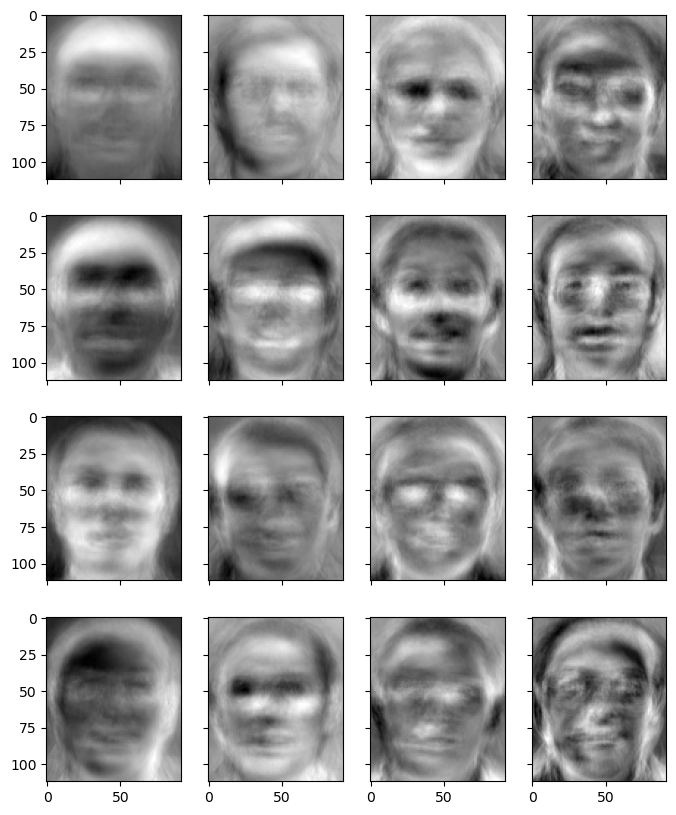

In [39]:
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

In [40]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T

In [41]:
# Test on out-of-sample image of existing class
query = image_dict["s39/10"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))

Best match s39 with Euclidean distance 0.000000


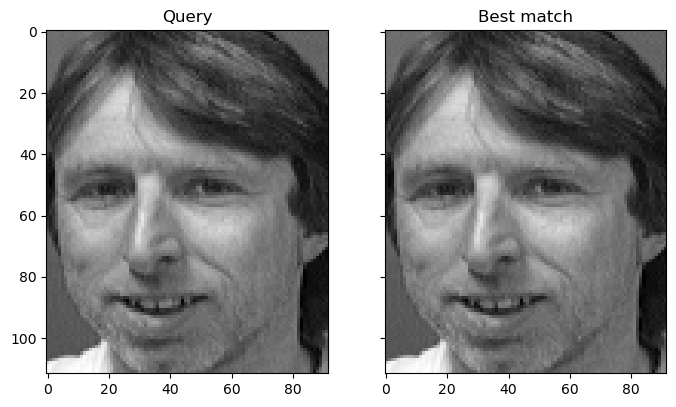

In [42]:
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

We can try again with the picture of the 40th person that we held out from the PCA. We would never get it correct because it is a new person to our model. However, we want to see how wrong it can be as well as the value in the  distance metric:

Best match s5 with Euclidean distance 2338.829342


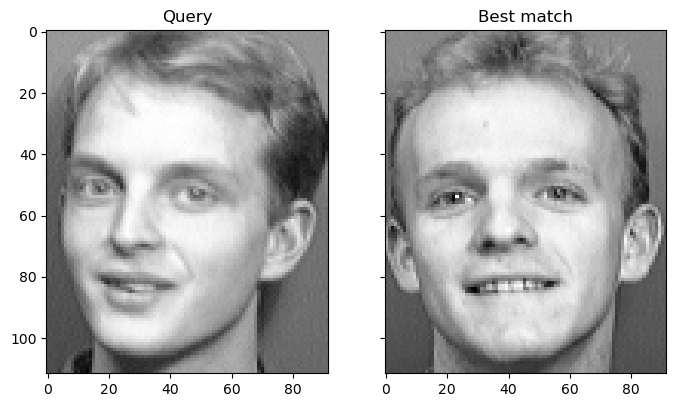

In [43]:
# Test on out-of-sample image of new class
query = image_dict["s40/1"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

Thanks to 

https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/


for the tutorial on eigen faces 

and Big Thanks to 

https://en.wikipedia.org/wiki/Eigenface

for such a lucid explanation of the topic